In [46]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('ams29.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [48]:
len(df)

18510

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18510 non-null  int64  
 1   N_Person           18510 non-null  int64  
 2   Xcenter            18510 non-null  float64
 3   Ycenter            18510 non-null  float64
 4   PerXmin            18510 non-null  float64
 5   PerYmin            18510 non-null  float64
 6   PerXmax            18510 non-null  float64
 7   PerYmax            18510 non-null  float64
 8   N_Handgun          18510 non-null  int64  
 9   HgXcenter          18510 non-null  float64
 10  HgYcenter          18510 non-null  float64
 11  HgXmin             18510 non-null  float64
 12  HgYmin             18510 non-null  float64
 13  HgXmax             18510 non-null  float64
 14  HgYmax             18510 non-null  float64
 15  Intersection       18510 non-null  object 
 16  Included_Center    185

In [50]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14262
Ycenter              14243
PerXmin              14270
PerYmin              14267
PerXmax              14270
PerYmax              14247
N_Handgun                5
HgXcenter             7303
HgYcenter             7301
HgXmin                7305
HgYmin                7305
HgXmax                7305
HgYmax                7304
Intersection             9
Included_Center          2
Intersection_Area     8480
Hg_Area               7305
Distance             18510
Ground_Truth             3
GT                       3
dtype: int64

In [51]:
df['Ground_Truth'].value_counts()

0    12997
1     5362
2      151
Name: Ground_Truth, dtype: int64

In [52]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18510 non-null  int64  
 1   N_Person                      18510 non-null  int64  
 2   Xcenter                       18510 non-null  float64
 3   Ycenter                       18510 non-null  float64
 4   PerXmin                       18510 non-null  float64
 5   PerYmin                       18510 non-null  float64
 6   PerXmax                       18510 non-null  float64
 7   PerYmax                       18510 non-null  float64
 8   N_Handgun                     18510 non-null  int64  
 9   HgXcenter                     18510 non-null  float64
 10  HgYcenter                     18510 non-null  float64
 11  HgXmin                        18510 non-null  float64
 12  HgYmin                        18510 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [54]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'MLP', 2: 'LR'}


In [55]:
print(df2['Ground_Truth'].value_counts())

0    12997
1     5362
2      151
Name: Ground_Truth, dtype: int64


In [56]:
df3 = df2.drop(columns=["GT"])

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18510 non-null  int64  
 1   N_Person                      18510 non-null  int64  
 2   Xcenter                       18510 non-null  float64
 3   Ycenter                       18510 non-null  float64
 4   PerXmin                       18510 non-null  float64
 5   PerYmin                       18510 non-null  float64
 6   PerXmax                       18510 non-null  float64
 7   PerYmax                       18510 non-null  float64
 8   N_Handgun                     18510 non-null  int64  
 9   HgXcenter                     18510 non-null  float64
 10  HgYcenter                     18510 non-null  float64
 11  HgXmin                        18510 non-null  float64
 12  HgYmin                        18510 non-null  float64
 13  H

In [58]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14808, 28) (14808,)
(3702, 28) (3702,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9069647268752178
mean_test =  0.9063347446028066


,fit_time,score_time,test_score,train_score
0,0.127732,0.003990,0.908845,0.904855
1,0.131696,0.003989,0.906144,0.911758
2,0.130651,0.002992,0.913572,0.905455
3,0.130773,0.004987,0.902093,0.908006
4,0.124665,0.003989,0.910871,0.908457
5,0.127784,0.003990,0.902768,0.908757
6,0.133644,0.003990,0.893991,0.909657
7,0.129653,0.004551,0.907495,0.901853
8,0.131799,0.003993,0.906757,0.901561
9,0.122785,0.003985,0.910811,0.909289


                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
15               Included_Center    0.001221  0.003664
27         Intersection_Up_right    0.001343  0.004028
19      Intersection_Center_left    0.001482  0.004447
24  Intersection_No_intersection    0.001754  0.005261
13                        HgXmax    0.011924  0.018592
9                      HgXcenter    0.012441  0.019486
4                        PerXmin    0.014387  0.019456
23           Intersection_Inside    0.014977  0.044930
0                          Frame    0.015235  0.039870
20     Intersection_Center_right    0.016805  0.034135
11                        HgXmin    0.019485  0.033507
6                        PerXmax    0.023362  0.062497
1         

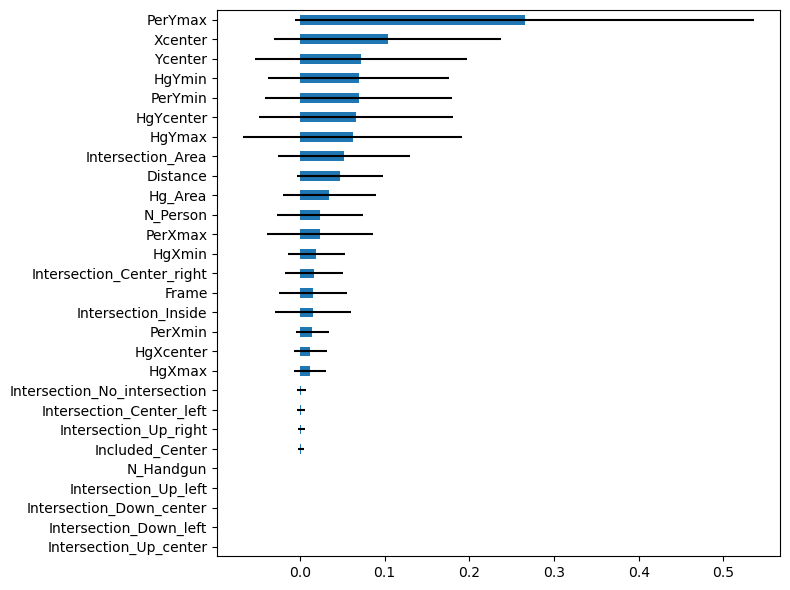

In [63]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2603
           1       0.94      0.70      0.81      1070
           2       0.92      0.79      0.85        29

    accuracy                           0.90      3702
   macro avg       0.92      0.83      0.86      3702
weighted avg       0.90      0.90      0.90      3702



In [65]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.9003241491085899


In [66]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9172654490802872

In [67]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.8265734187813981

In [68]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.8637923176215828

In [20]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [21]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18510 non-null  int64  
 1   N_Person                      18510 non-null  int64  
 2   Xcenter                       18510 non-null  float64
 3   Ycenter                       18510 non-null  float64
 4   PerXmin                       18510 non-null  float64
 5   PerYmin                       18510 non-null  float64
 6   PerXmax                       18510 non-null  float64
 7   PerYmax                       18510 non-null  float64
 8   N_Handgun                     18510 non-null  int64  
 9   HgXcenter                     18510 non-null  float64
 10  HgYcenter                     18510 non-null  float64
 11  HgXmin                        18510 non-null  float64
 12  HgYmin                        18510 non-null  float64
 13  H

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86293266, -1.00623299,  0.38710779, -1.05722455,  0.40814641,
        -0.80100981,  0.35042015, -1.42473948, -0.49664768,  0.64847233,
        -1.25701145,  0.70110968, -1.17592094,  0.59442466, -1.33343312,
         1.17725282, -0.05014463, -0.63089145, -0.69607319,  2.66736985,
        -0.28372054, -0.01643768, -0.01039526, -0.53858636, -1.08354337,
        -0.11982378, -0.06161246, -0.13943291],
       [-1.8607643 , -1.00623299,  0.38682209, -1.05663446,  0.40716422,
        -0.79932085,  0.35086568, -1.42748448, -0.49664768,  0.64687638,
        -1.25786519,  0.69810647, -1.1765719 ,  0.59422359, -1.33449155,
         1.17725282, -0.04772349, -0.62499078, -0.69464478,  2.66736985,
        -0.28372054, -0.01643768, -0.01039526, -0.53858636, -1.08354337,
        -0.11982378, -0.06161246, -0.13943291],
       [-1.85859595, -1.00623299,  0.38744255, -1.05878735,  0.40863327,
        -0.80337505,  0.35058471, -1.42347836, -0.49664768,  0.6466977 ,
        -1.25927866,  0.6980

In [24]:
print(scaler.mean_)

[8.59146407e+02 8.79254457e-01 3.92879951e+02 3.82356581e+02
 3.05643294e+02 2.46028462e+02 4.80116609e+02 5.18684701e+02
 2.98271205e-01 3.10756034e+02 3.12311208e+02 2.87390757e+02
 2.92772122e+02 3.34121312e+02 3.31850295e+02 4.19124797e-01
 9.28342651e+02 2.02399560e+03 2.31797811e+02 1.23230686e-01
 7.45002701e-02 2.70124257e-04 1.08049703e-04 2.24851432e-01
 5.40032415e-01 1.41545111e-02 3.78173960e-03 1.90707726e-02]


In [25]:
print(scaler.scale_)

[4.61179530e+02 8.73808016e-01 2.12136004e+02 6.88346052e+01
 2.19857274e+02 1.11890935e+02 2.12616318e+02 3.92503565e+01
 6.00569003e-01 1.52860732e+02 9.72650246e+01 1.52149684e+02
 9.92044112e+01 1.54062068e+02 9.58952900e+01 4.93415851e-01
 1.66353699e+03 1.81090961e+03 1.37452383e+02 3.28701816e-01
 2.62583282e-01 1.64332374e-02 1.03941343e-02 4.17484449e-01
 4.98394829e-01 1.18127731e-01 6.13794595e-02 1.36773821e-01]


In [26]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [27]:
X_train.shape

(13882, 28)

In [28]:
y_train.value_counts()

0    9748
1    4021
2     113
Name: Ground_Truth, dtype: int64

In [29]:
X_test.shape

(4628, 28)

In [30]:
y_test.value_counts()

0    3249
1    1341
2      38
Name: Ground_Truth, dtype: int64

In [31]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[7.36956465e-06, 9.99992630e-01, 9.47990055e-12],
       [9.99999961e-01, 3.87891566e-08, 1.24170108e-10],
       [4.43483240e-12, 1.00000000e+00, 6.27528537e-14],
       ...,
       [3.30244609e-12, 1.00000000e+00, 5.92359651e-15],
       [3.35286043e-09, 9.99999997e-01, 1.29881538e-10],
       [9.99972892e-01, 2.69591797e-05, 1.48475078e-07]])

In [32]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3249
           1       0.97      0.96      0.96      1341
           2       0.95      0.97      0.96        38

    accuracy                           0.98      4628
   macro avg       0.97      0.97      0.97      4628
weighted avg       0.98      0.98      0.98      4628



In [35]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.991355712433367
Score test =  0.9779602420051858


In [42]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.9779602420051858


In [43]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9662863766058974

In [44]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9726913047759318

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9694260714166685

In [36]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 